In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.cla import CLA
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [3]:
# Fetch historical stock data using yfinance
def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data


In [4]:
# Parameters
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
start_date = "2020-01-01"
end_date = "2023-12-31"


In [16]:
# Fetch data
data = fetch_stock_data(tickers, start_date, end_date)
print("Preview of Stock Data:")
print(data.head())


[*********************100%***********************]  5 of 5 completed

Preview of Stock Data:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.796021  94.900497  68.264961  153.630692  28.684000
2020-01-03  72.088295  93.748497  67.907845  151.717712  29.534000
2020-01-06  72.662704  95.143997  69.717865  152.109894  30.102667
2020-01-07  72.320961  95.343002  69.583206  150.723022  31.270666
2020-01-08  73.484352  94.598503  70.078476  153.123734  32.809334


In [27]:
# Calculate expected returns and covariance matrix
expected_returns = mean_historical_return(data)
cov_matrix = CovarianceShrinkage(data).ledoit_wolf()
print("\nExpected Returns:")
print(expected_returns)
print("\ncovariance matrix:")
print(cov_matrix)


Expected Returns:
Ticker
AAPL     0.274620
AMZN     0.125261
GOOGL    0.195927
MSFT     0.249303
TSLA     0.718354
dtype: float64

covariance matrix:
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.113403  0.078015  0.076881  0.084037  0.115362
AMZN    0.078015  0.142403  0.082941  0.082462  0.115164
GOOGL   0.076881  0.082941  0.113173  0.083479  0.096612
MSFT    0.084037  0.082462  0.083479  0.107174  0.103605
TSLA    0.115362  0.115164  0.096612  0.103605  0.460281


In [28]:
# Optimize Portfolio
ef = EfficientFrontier(expected_returns, cov_matrix)

# Maximize Sharpe Ratio
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print("\nOptimized Portfolio Weights:")
print(cleaned_weights)

# Portfolio Performance
performance = ef.portfolio_performance(verbose=True)




Optimized Portfolio Weights:
OrderedDict({'AAPL': 0.30231, 'AMZN': 0.0, 'GOOGL': 0.0, 'MSFT': 0.20308, 'TSLA': 0.49461})
Expected annual return: 48.9%
Annual volatility: 43.9%
Sharpe Ratio: 1.11


[*********************100%***********************]  5 of 5 completed
/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_5655/2101778256.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (S.iloc[i, i]**0.5, mu[i]), fontsize=10)


Expected annual return: 48.8%
Annual volatility: 44.1%
Sharpe Ratio: 1.11


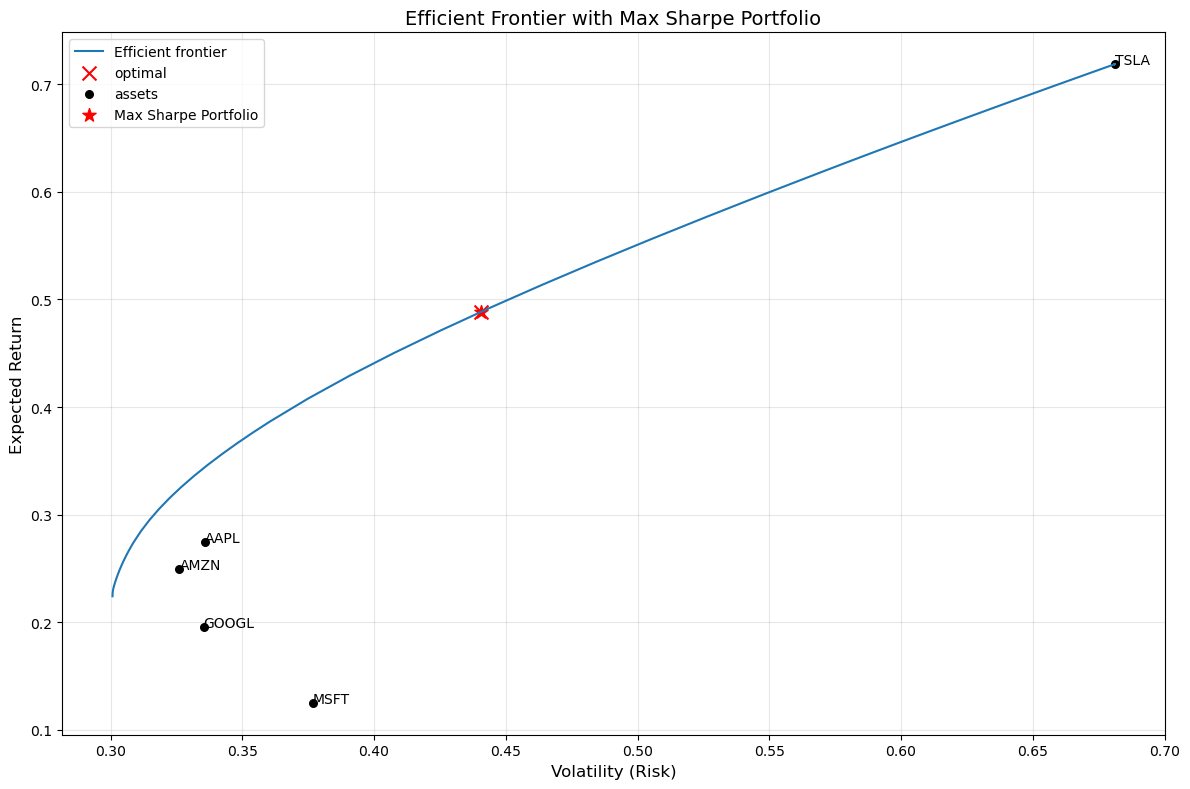

In [31]:
# Importing libraries 
from pypfopt import EfficientFrontier, risk_models, expected_returns
from pypfopt.cla import CLA
from pypfopt.plotting import plot_efficient_frontier
import matplotlib.pyplot as plt
import yfinance as yf

# Download stock data
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")["Adj Close"]

# Calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Plot the Efficient Frontier
cla = CLA(mu, S)
fig, ax = plt.subplots(figsize=(12, 8))
plot_efficient_frontier(cla, ax=ax, show_assets=True)

# Create a new Efficient Frontier instance for max Sharpe portfolio
ef_sharpe = EfficientFrontier(mu, S)
max_sharpe_weights = ef_sharpe.max_sharpe()
expected_return, volatility, sharpe_ratio = ef_sharpe.portfolio_performance(verbose=True)

# Highlight the maximum Sharpe ratio portfolio
plt.scatter(volatility, expected_return, c="r", marker="*", s=100, label="Max Sharpe Portfolio")

# Annotate individual assets
for i, txt in enumerate(tickers):
    plt.annotate(txt, (S.iloc[i, i]**0.5, mu[i]), fontsize=10)

# Add title, labels, and grid
plt.title("Efficient Frontier with Max Sharpe Portfolio", fontsize=14)
plt.xlabel("Volatility (Risk)", fontsize=12)
plt.ylabel("Expected Return", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [32]:
# Discrete Allocation
latest_prices = get_latest_prices(data)
capital = 100000  # Specify your investment capital
da = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("\nDiscrete Allocation:")
print("Allocation:", allocation)
print(f"Funds remaining: ${leftover:.2f}")



Discrete Allocation:
Allocation: {'AAPL': 158, 'MSFT': 54, 'TSLA': 199}
Funds remaining: $125.60
